In [3]:
from db_queries import get_outputs as go
from db_queries import get_ids
import matplotlib.pyplot as plt
from get_draws.api import get_draws
import numpy as np
import pandas as pd

In [8]:
df = get_draws('modelable_entity_id',
                18706,
                source='epi',
                location_id=523,
                age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32],
                sex_id=[1,2],
                year_id=2019,
                gbd_round_id=6, 
                status= 'best', 
                decomp_step= 'step4')
df.head()

,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_997,draw_998,draw_999,location_id,measure_id,metric_id,modelable_entity_id,sex_id,year_id,model_version_id
0,10,10.389291,28.163219,9.389077,9.543693,5.593915,9.595318,9.567489,9.637315,8.995256,...,9.332178,9.078360,9.709188,523,19,3,18706,2,2019,456968
1,11,10.785260,10.312513,10.168950,9.839899,5.691297,9.934976,9.843042,9.752695,9.424166,...,5.929432,5.786236,9.875660,523,19,3,18706,2,2019,456968
2,12,10.184081,10.500658,10.174549,6.111129,5.894871,9.981028,9.907108,9.971907,9.589588,...,9.469922,9.492557,10.278603,523,19,3,18706,2,2019,456968
3,13,10.155598,10.464742,10.370496,9.839383,5.789768,10.994327,10.559358,10.077005,6.002843,...,9.866646,9.424783,10.086184,523,19,3,18706,2,2019,456968
4,14,10.628806,10.924765,10.679437,6.216699,5.945142,10.061196,9.916136,9.912958,6.106936,...,9.851227,9.479830,10.333193,523,19,3,18706,2,2019,456968


In [2]:
gbd_data = go("sequela", sequela_id = [6167,6443,6635], gbd_round_id=5, age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33], measure_id="all", metric_id=3, location_id=523, year_id=2017, sex_id=[1,2])
gbd_data.head()

,age_group_id,location_id,measure_id,metric_id,sequela_id,sex_id,year_id,age_group_name,expected,location_name,location_type,measure_name,metric_name,sequela_name,sex,val,upper,lower
0,10,523,3,3,6635,1,2017,25 to 29,False,Alabama,admin1,YLDs (Years Lived with Disability),Rate,Myocardial infarction due to ischemic heart di...,Male,1.062227e-06,1.832278e-06,4.720616e-07
1,10,523,3,3,6635,2,2017,25 to 29,False,Alabama,admin1,YLDs (Years Lived with Disability),Rate,Myocardial infarction due to ischemic heart di...,Female,5.074377e-07,9.869895e-07,1.650962e-07
2,10,523,3,3,6167,1,2017,25 to 29,False,Alabama,admin1,YLDs (Years Lived with Disability),Rate,Angina due to ischemic heart disease,Male,2.242664e-05,5.187147e-05,4.305604e-06
3,10,523,3,3,6167,2,2017,25 to 29,False,Alabama,admin1,YLDs (Years Lived with Disability),Rate,Angina due to ischemic heart disease,Female,2.152675e-05,3.132627e-05,1.395445e-05
4,10,523,3,3,6443,1,2017,25 to 29,False,Alabama,admin1,YLDs (Years Lived with Disability),Rate,Heart failure due to ischemic heart disease,Male,3.376064e-06,5.473768e-06,1.846659e-06


In [3]:
gbd_data.measure_name.unique()

array(['YLDs (Years Lived with Disability)', 'Prevalence', 'Incidence'],
      dtype=object)

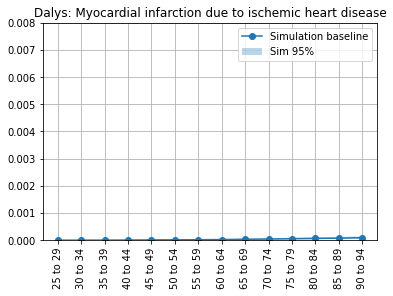

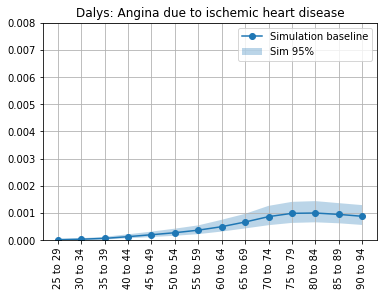

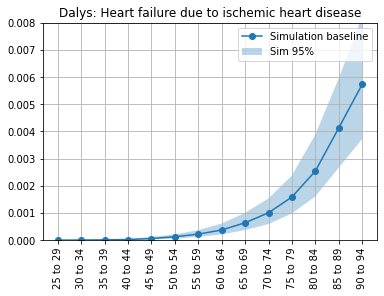

In [4]:
for squ in gbd_data.sequela_name.unique():
    plt.figure() 
    subdata = gbd_data.loc[(gbd_data.measure_name=='YLDs (Years Lived with Disability)')&(gbd_data.sex_id==2)&(gbd_data.sequela_name==squ)]
    plt.plot(subdata['age_group_name'], subdata['val'], marker='o')
    plt.fill_between(subdata['age_group_name'], subdata['lower'], subdata['upper'], alpha=.3)
    plt.title(f'Dalys: {squ}') 
    plt.xticks(rotation=90) 
    plt.ylim(0,0.008)
    plt.grid()
    plt.legend(['Simulation baseline', 'Sim 95%', 'GBD Baseline', 'GBD 95%']) 

In [5]:
me = get_ids('modelable_entity', 19797)

In [6]:
me.loc[me['modelable_entity_id']==19797]

,modelable_entity_id,modelable_entity_name,modelable_entity_description,model_type_id,model_type
6631,19797,outpatient_envelope,Create a model for outpatient visits per capita,3,dismod


In [4]:
df = get_draws('modelable_entity_id',
                19797,
                source='epi',
                location_id=523,
                age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33],
                sex_id=[1,2],
                year_id=2017,
                gbd_round_id=5)
df.head()

/ihme/homes/lutzes/.conda/envs/vivarium_nih_us_cvd/lib/python3.8/site-packages/get_draws/sources/epi.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["metric_id"] = gbd.metrics.RATE
/ihme/homes/lutzes/.conda/envs/vivarium_nih_us_cvd/lib/python3.8/site-packages/get_draws/transforms/version_transforms.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[version_id_type_name] = version_id


,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_997,draw_998,draw_999,location_id,measure_id,sex_id,year_id,metric_id,model_version_id,modelable_entity_id
0,10,2.2830,3.917,2.6120,1.8600,3.3145,2.2645,2.7120,2.7270,3.4980,...,2.3675,2.6305,2.6195,523,19,2,2017,3,246617,19797
1,11,2.5122,4.240,2.7812,2.0005,2.9595,2.3145,4.4600,3.5280,3.9638,...,2.3083,2.2835,3.1888,523,19,2,2017,3,246617,19797
2,12,3.6947,3.296,2.9858,3.1555,3.5065,3.0535,5.3760,2.6740,3.1712,...,2.6147,3.0785,3.8723,523,19,2,2017,3,246617,19797
3,13,4.8835,4.226,4.1920,3.9205,4.4840,3.4590,4.7090,2.8445,2.6590,...,2.8045,3.4085,2.7175,523,19,2,2017,3,246617,19797
4,14,3.8345,5.290,5.5095,4.1065,4.2680,3.7945,3.9005,3.4535,3.2185,...,4.0720,4.0485,2.5050,523,19,2,2017,3,246617,19797


In [5]:
mean_df = df.iloc[:,1:1001]
df['mean'] = mean_df.mean(axis=1)
df.head()

,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_998,draw_999,location_id,measure_id,sex_id,year_id,metric_id,model_version_id,modelable_entity_id,mean
0,10,2.2830,3.917,2.6120,1.8600,3.3145,2.2645,2.7120,2.7270,3.4980,...,2.6305,2.6195,523,19,2,2017,3,246617,19797,2.639679
1,11,2.5122,4.240,2.7812,2.0005,2.9595,2.3145,4.4600,3.5280,3.9638,...,2.2835,3.1888,523,19,2,2017,3,246617,19797,2.903855
2,12,3.6947,3.296,2.9858,3.1555,3.5065,3.0535,5.3760,2.6740,3.1712,...,3.0785,3.8723,523,19,2,2017,3,246617,19797,3.165061
3,13,4.8835,4.226,4.1920,3.9205,4.4840,3.4590,4.7090,2.8445,2.6590,...,3.4085,2.7175,523,19,2,2017,3,246617,19797,3.527738
4,14,3.8345,5.290,5.5095,4.1065,4.2680,3.7945,3.9005,3.4535,3.2185,...,4.0485,2.5050,523,19,2,2017,3,246617,19797,3.905085


In [6]:
df['age_start'] = np.where(df['age_group_id']==10,25,np.where(df['age_group_id']==11,30,np.where(df['age_group_id']==12,35,np.where(df['age_group_id']==13,40,np.where(df['age_group_id']==14,45,np.where(df['age_group_id']==15,50,np.where(df['age_group_id']==16,55,np.where(df['age_group_id']==17,60,np.where(df['age_group_id']==18,65,np.where(df['age_group_id']==19,70,np.where(df['age_group_id']==20,75,np.where(df['age_group_id']==30,80,np.where(df['age_group_id']==31,85,np.where(df['age_group_id']==32,90,np.where(df['age_group_id']==33,95,0)))))))))))))))
df['sex'] = np.where(df['sex_id']==1,'Male','Female')
df = df.sort_values(by=['age_start'])
df.head()

,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,location_id,measure_id,sex_id,year_id,metric_id,model_version_id,modelable_entity_id,mean,age_start,sex
0,10,2.2830,3.9170,2.6120,1.8600,3.3145,2.2645,2.7120,2.7270,3.4980,...,523,19,2,2017,3,246617,19797,2.639679,25,Female
15,10,1.2020,1.8460,1.1370,1.0084,1.6660,1.0042,1.3745,1.4914,1.8220,...,523,19,1,2017,3,246617,19797,1.287541,25,Male
1,11,2.5122,4.2400,2.7812,2.0005,2.9595,2.3145,4.4600,3.5280,3.9638,...,523,19,2,2017,3,246617,19797,2.903855,30,Female
16,11,1.4390,1.9298,1.2158,1.1066,1.3963,1.1450,2.3960,1.9783,2.1002,...,523,19,1,2017,3,246617,19797,1.500861,30,Male
2,12,3.6947,3.2960,2.9858,3.1555,3.5065,3.0535,5.3760,2.6740,3.1712,...,523,19,2,2017,3,246617,19797,3.165061,35,Female


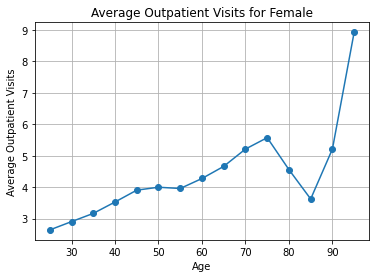

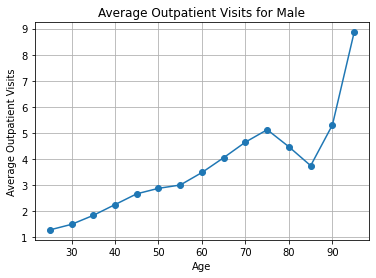

In [11]:
for sex in df.sex.unique():
    plt.figure() 
    subdata = df.loc[df['sex']==sex]
    plt.plot(subdata['age_start'], subdata['mean'], marker='o')
    plt.grid()
    plt.title(f'Average Outpatient Visits for {sex}') 
    plt.ylabel('Average Outpatient Visits')
    plt.xlabel('Age')


In [55]:
mean_df = df.iloc[:,1:1001]

def count_values_in_range(series, range_min, range_max):
    return series.between(left=range_min, right=range_max).sum()

mean_df["less_than_1"] = mean_df.apply(
    func=lambda row: count_values_in_range(row, 0, 1), axis=1)
mean_df

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999,less_than_1
15,1.2020,1.8460,1.1370,1.0084,1.6660,1.0042,1.3745,1.4914,1.8220,1.0685,...,1.26450,1.0495,0.83305,1.5550,1.7530,1.1513,1.1520,1.2026,1.1964,185
0,2.2830,3.9170,2.6120,1.8600,3.3145,2.2645,2.7120,2.7270,3.4980,2.1990,...,2.39400,2.1220,2.12050,3.8240,3.7090,2.2865,2.3675,2.6305,2.6195,0
16,1.4390,1.9298,1.2158,1.1066,1.3963,1.1450,2.3960,1.9783,2.1002,1.7400,...,0.90625,0.8920,0.92270,1.4038,2.2230,1.7743,1.1880,1.1695,1.6947,52
1,2.5122,4.2400,2.7812,2.0005,2.9595,2.3145,4.4600,3.5280,3.9638,3.4792,...,1.98250,1.5343,1.97050,3.1680,4.1670,3.4720,2.3083,2.2835,3.1888,0
17,2.1830,1.7912,1.6033,2.1102,1.9968,1.8143,3.1500,1.5868,1.9007,2.7040,...,1.30480,1.1360,1.28690,1.4372,2.1190,2.6807,1.4820,1.7878,2.2763,6
2,3.6947,3.2960,2.9858,3.1555,3.5065,3.0535,5.3760,2.6740,3.1712,4.5738,...,2.59150,1.9028,2.34950,2.6560,3.2470,4.4580,2.6147,3.0785,3.8723,0
18,3.1490,2.6385,2.6165,2.6605,2.6985,2.1880,3.0010,1.9255,1.9055,2.6795,...,1.73450,1.7655,2.81950,2.2695,2.3825,3.0120,1.5985,2.1390,1.6676,0
3,4.8835,4.2260,4.1920,3.9205,4.4840,3.4590,4.7090,2.8445,2.6590,4.1255,...,2.96050,2.7840,4.11850,3.6095,3.3230,4.4755,2.8045,3.4085,2.7175,0
19,2.6875,3.4760,3.7865,2.7920,2.9275,2.4930,2.6425,2.5460,2.2245,3.4035,...,2.86850,2.0595,3.19150,2.8875,2.8395,2.7945,2.5865,2.7470,1.6730,0
4,3.8345,5.2900,5.5095,4.1065,4.2680,3.7945,3.9005,3.4535,3.2185,4.8140,...,4.28150,2.9930,4.53900,4.4120,4.3825,3.9260,4.0720,4.0485,2.5050,0


In [5]:
test = get_ids('modelable_entity', 24694)
test.loc[test['modelable_entity_id']==24694]

,modelable_entity_id,modelable_entity_name,modelable_entity_description,model_type_id,model_type
6892,24694,Myocardial infarction due to ischemic heart di...,Running for EMR comparison,3,dismod


In [8]:
df_mi = get_draws('modelable_entity_id',
                24694,
                source='epi',
                location_id=523,
                age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33],
                sex_id=[1,2],
                year_id=2019,
                gbd_round_id=6,
                 decomp_step='step4')


In [9]:
df_mi

,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,draw_997,draw_998,draw_999,location_id,measure_id,sex_id,year_id,metric_id,model_version_id,modelable_entity_id
0,10,12.348000,11.535000,11.943000,11.742000,12.020000,12.288000,12.595000,11.555000,11.873000,...,12.475000,11.805000,11.892000,523,7,2,2019,3,478994,24694
1,11,12.203000,11.410000,11.955000,11.928000,12.015000,12.305000,12.693000,11.420000,11.838000,...,12.070000,11.478000,11.947000,523,7,2,2019,3,478994,24694
2,12,11.948000,11.150000,11.965000,11.943000,12.405000,12.475000,12.738000,11.860000,11.753000,...,11.510000,11.593000,11.603000,523,7,2,2019,3,478994,24694
3,13,11.983000,11.275000,12.103000,11.797000,12.455000,12.428000,12.648000,12.110000,11.680000,...,11.523000,11.525000,11.475000,523,7,2,2019,3,478994,24694
4,14,12.308000,11.785000,12.367000,11.493000,12.165000,12.162000,12.423000,12.170000,11.620000,...,12.108000,11.275000,11.565000,523,7,2,2019,3,478994,24694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,20,0.015951,0.013678,0.018598,0.016968,0.016562,0.014176,0.017264,0.015560,0.014631,...,0.014847,0.015281,0.014808,523,6,1,2019,3,478994,24694
296,30,0.020398,0.018756,0.023332,0.019247,0.019760,0.019427,0.024427,0.020218,0.019620,...,0.020173,0.020695,0.020033,523,6,1,2019,3,478994,24694
297,31,0.025130,0.026525,0.027784,0.020481,0.023973,0.028402,0.032808,0.025289,0.027544,...,0.028305,0.028754,0.026465,523,6,1,2019,3,478994,24694
298,32,0.034940,0.034594,0.035692,0.028926,0.031089,0.035945,0.038144,0.031517,0.037344,...,0.034471,0.034670,0.033214,523,6,1,2019,3,478994,24694
